In [6]:
#Name: Srinitish Srinivasan
#Register Number: 21BAI1394

In [7]:
import keras
from keras.datasets import mnist
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Load dataset
(train_x,train_y),(test_x,test_y)=mnist.load_data()

#Preprocessing
train_x=(train_x.reshape((60000,28,28,1))/255)
test_x=(test_x.reshape((10000,28,28,1))/255)

In [9]:
#Convert to one hot
def convert_to_one_hot(label,depth=10):
    encoded=tf.one_hot(label,depth,axis=0)
    
    return encoded

In [10]:
train_y,test_y=np.array(convert_to_one_hot(train_y)),np.array(convert_to_one_hot(test_y))
train_y,test_y=np.transpose(train_y),np.transpose(test_y)

In [26]:
#Make Model
nn=tf.keras.Sequential()
nn.add(tf.keras.layers.Input((28,28,1)))
nn.add(tf.keras.layers.Conv2D(kernel_size=(3,3),padding='same',strides=1,filters=4,kernel_initializer='he_normal',activation='relu'))
nn.add(tf.keras.layers.Conv2D(kernel_size=(3,3),padding='same',strides=1,filters=8,activation='relu',kernel_initializer='he_normal'))
nn.add(tf.keras.layers.MaxPooling2D((2,2)))
nn.add(tf.keras.layers.Flatten())
nn.add(tf.keras.layers.Dense(units=1000,activation='relu',kernel_initializer='he_normal'))
nn.add(tf.keras.layers.Dense(units=800,activation='relu',kernel_initializer='he_normal'))
nn.add(tf.keras.layers.Dense(units=10,kernel_initializer='he_normal',activation='softmax'))



In [27]:
nn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 4)         40        
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 8)         296       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 1000)              1569000   
                                                                 
 dense_4 (Dense)             (None, 800)               800800    
                                                      

In [29]:
#Compile and Fit
nn.compile(optimizer=tf.keras.optimizers.legacy.Adam(),loss=keras.losses.CategoricalCrossentropy(),metrics=keras.metrics.CategoricalAccuracy())

In [30]:
#Srinitish Srinivasan 21BAI1394
learning=nn.fit(train_x,train_y,epochs=5,batch_size=32,verbose=True)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 2801.5356 - categorical_accuracy: 0.8393
Epoch 2/5
1875/1875 [==============================] - 20s 10ms/step - loss: 314571.9062 - categorical_accuracy: 0.8063
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 2627050.0000 - categorical_accuracy: 0.7956
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 9061359.0000 - categorical_accuracy: 0.7929
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 20973766.0000 - categorical_accuracy: 0.7916


Text(0.5, 1.0, 'Loss vs Epoch')

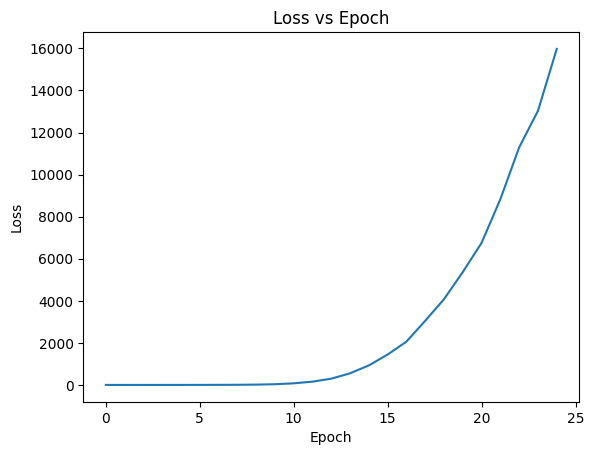

In [24]:
plt.plot(learning.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")

Text(0.5, 1.0, 'Accuracy vs epoch')

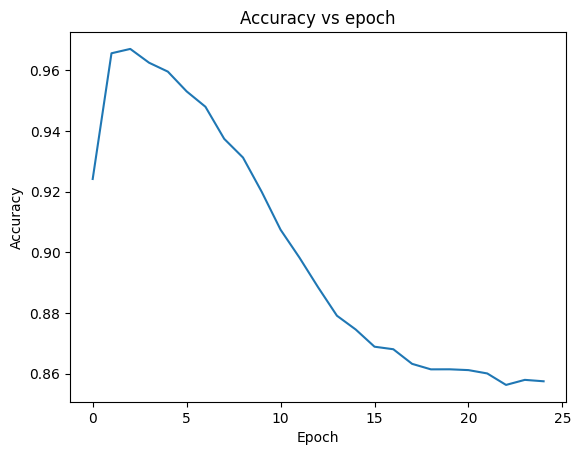

In [25]:
plt.plot(learning.history['categorical_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs epoch")